# **Lab2 task**

Use pytorch/Tensorflow to implement an specific classification DNN model, dataset Fashion MNIST

1.   Design model by keras.sequential model, 3 layer of CNN network (10%), 3 layer of NN network (10%)

1.   Comparison w/ and w/o Batch Normalizatoin Layer (10%)

1.   Comparison w/ arbitrary layer of abovementioned CNN network. (10%)

1.   Print model summary and plot model (10%)

1.   Print test accuracy, plot train-epoch, val-epoch, train-loss, val-loss (20%)
2.   Plot certain image from dataset and successively predict (10%)

1.   Report(30%)


**Q&A: course.aislab@gmail.com**








# Import from framework

In [6]:
!pip install utils
import tensorflow as tf
import pickle
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.python import keras
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.utils import plot_model
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from sklearn import metrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Load dataset

In [7]:
# Load MNIST dataset
# Keras images are 28x28 array rather than a 1D array of size 784
# Pixels intensities are integers (0 to 255) rather than floats (0.0 to 255.0)

# train_X is the dataset of 28x28 images of handwritten digits that the model will be trained on
# train_y is the dataset of labels that correspond to train_X
# test_X is the dataset of 28x28 images of handwritten digits that model will be tested on
# test_y is the dataset of labels correspond to test_X
(train_X, train_y), (test_X, test_y) = load_data()
train_X = train_X.reshape(-1, 28, 28, 1) # "-1"menas auto calculate
test_X = test_X.reshape(-1, 28, 28, 1)

train_X = train_X.astype('float32') / 255.0 # Normalization, Normalize pixal values to be between 0 and 1
test_X = test_X.astype('float32') / 255.0

train_y = train_y.reshape(-1,1) #reshape(-1,1)->將矩陣重組，列數固定，行數需要計算
test_y  = test_y.reshape(-1,1)
# Dataset already split in Training and Testing
# Train_X for images and train_y for labels
#shape of train_X should be (10, 28, 28, 1), which is (class, height, width, channel)
#shape of train_y should be (10,1), which is (class, channel(only needs one to store class info))

# check for NaN Values
#NaN_test1 = np.isnan(train_X).any()
#NaN_test2 = np.isnan(test_X).any()
#print(NaN_test1,NaN_test2)

11501568/11490434 [==============================] - 0s 0us/step


/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


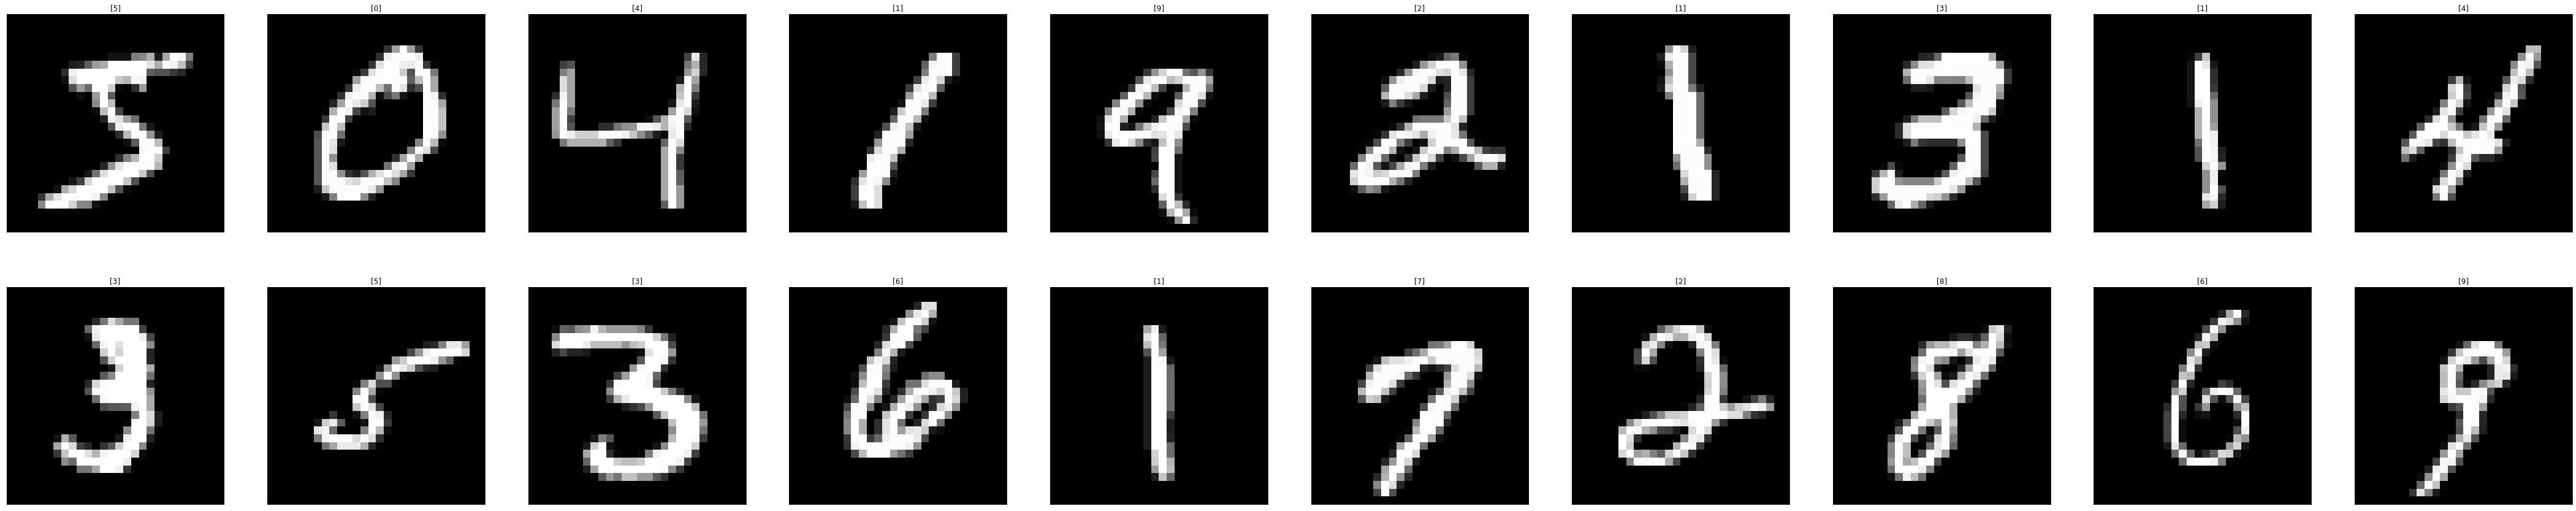

In [8]:
#show some image from MNIST dataset
imageMNIST = plt.figure(figsize=(75,15))
for i in range (20):
  ax = imageMNIST.add_subplot(2,10, i+1, xticks=[], yticks=[])
  ax.imshow(np.squeeze(train_X[i]), cmap='gray')
  ax.set_title(train_y[i])

# Fill up the configuration for model

In [9]:
#Settings:
#inputShape = (height,width,depth)
InputShape = (28, 28, 1) #input demension
classes = 10 #class of MNIST
num_epochs = 5  #要訓練的epoch數 -> 訓練次數
num_batch_size = 50 #訓練的batch size -> 一次進去幾張圖片
num_validation_split = 0.1

# Create your own model

In [10]:
from sklearn.metrics.pairwise import kernel_metrics
#model.add to add layer
#model.add(layer_name(number_of_filters, (window_size,window_size), input_shape)) 

#2 way of adding activation function
#(1)model.add(Activation("relu"))
#(2)model.add(Dense(1), activation="relu")

# Initial_Normal_Model
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))


# Model_with_Batch_Normalization
model_BN = Sequential()
model_BN.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(28, 28, 1)))
model_BN.add(BatchNormalization())
model_BN.add(MaxPooling2D((2, 2)))
model_BN.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model_BN.add(BatchNormalization())
model_BN.add(MaxPooling2D((2, 2)))
model_BN.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model_BN.add(BatchNormalization())
model_BN.add(MaxPooling2D((2, 2)))
model_BN.add(Flatten())
model_BN.add(Dense(64, activation='relu'))
model_BN.add(Dense(64, activation='relu'))
model_BN.add(Dense(10, activation='softmax'))


# model_with_shallower_layer
model_SL = Sequential()
model_SL.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(28, 28, 1)))
model_SL.add(MaxPooling2D((2, 2)))
model_SL.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model_SL.add(MaxPooling2D((2, 2)))
model_SL.add(Flatten())
model_SL.add(Dense(64, activation='relu'))
model_SL.add(Dense(64, activation='relu'))
model_SL.add(Dense(10, activation='softmax'))


# model_with_deeper_layer
model_DL = Sequential()
model_DL.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(28, 28, 1)))
model_DL.add(MaxPooling2D((2, 2)))
model_DL.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model_DL.add(MaxPooling2D((2, 2)))
model_DL.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model_DL.add(MaxPooling2D((2, 2)))
model_DL.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model_DL.add(MaxPooling2D((2, 2)))
model_DL.add(Flatten())
model_DL.add(Dense(64, activation='relu'))
model_DL.add(Dense(64, activation='relu'))
model_DL.add(Dense(10, activation='softmax'))


#model compile to configure model
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
model_BN.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
model_SL.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
model_DL.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [11]:
#print model
print("Baseline_Model　↓")
model.summary()
print("Model_with_BN ↓")
model_BN.summary()
print("Model_with_shallower_layer ↓")
model_SL.summary()
print("Model_with_deeper_layer ↓")
model_DL.summary()


Baseline_Model　↓
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3,

↓↓↓ Baseline_Model ↓↓↓


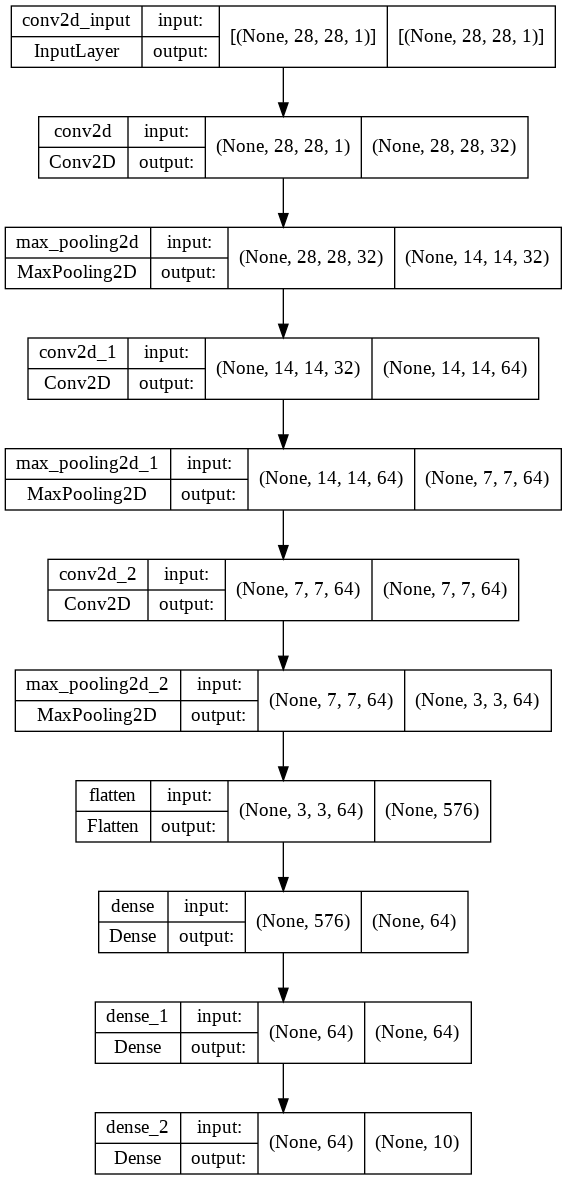

In [12]:
#plot model 
print("↓↓↓ Baseline_Model ↓↓↓")
plot_model(model, to_file='model.png', show_shapes="True")

↓↓↓ Model_with_Batch_Normalization_layer ↓↓↓


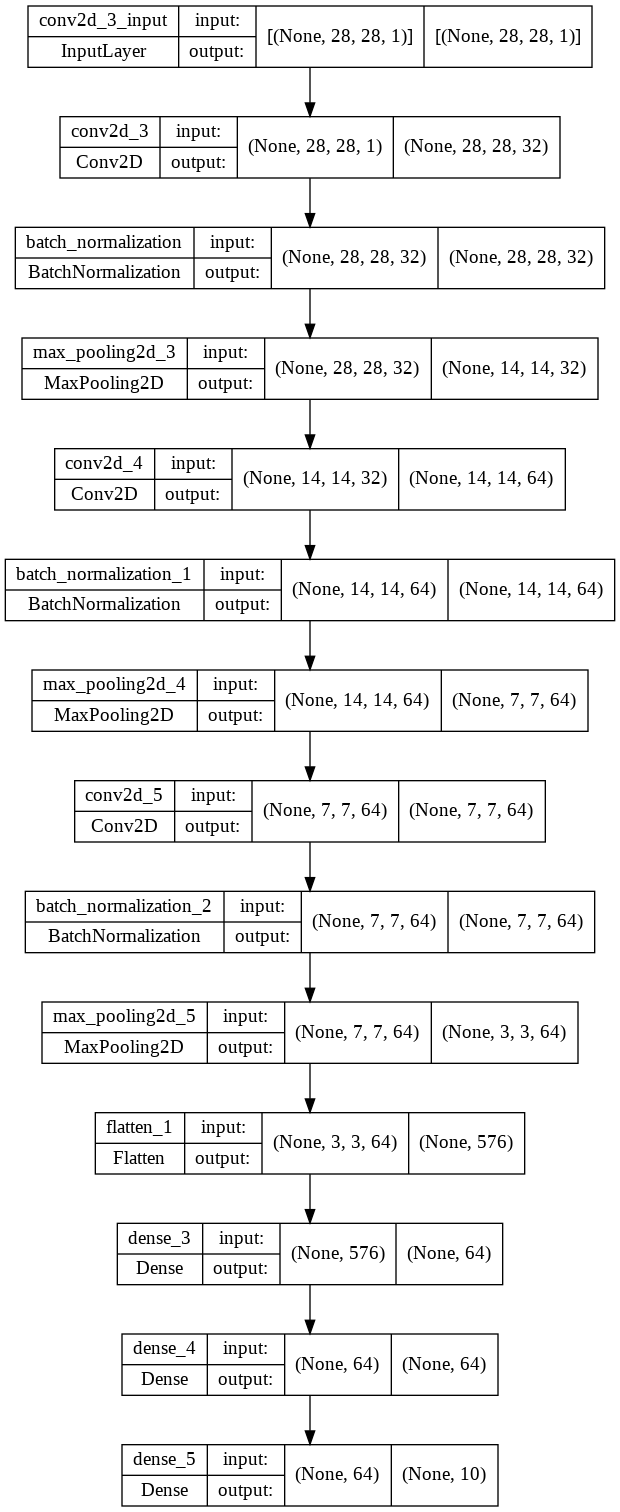

In [13]:
#plot model 
print("↓↓↓ Model_with_Batch_Normalization_layer ↓↓↓")
plot_model(model_BN, to_file='model.png', show_shapes="True")

↓↓↓ Model_with_shallower_layer ↓↓↓


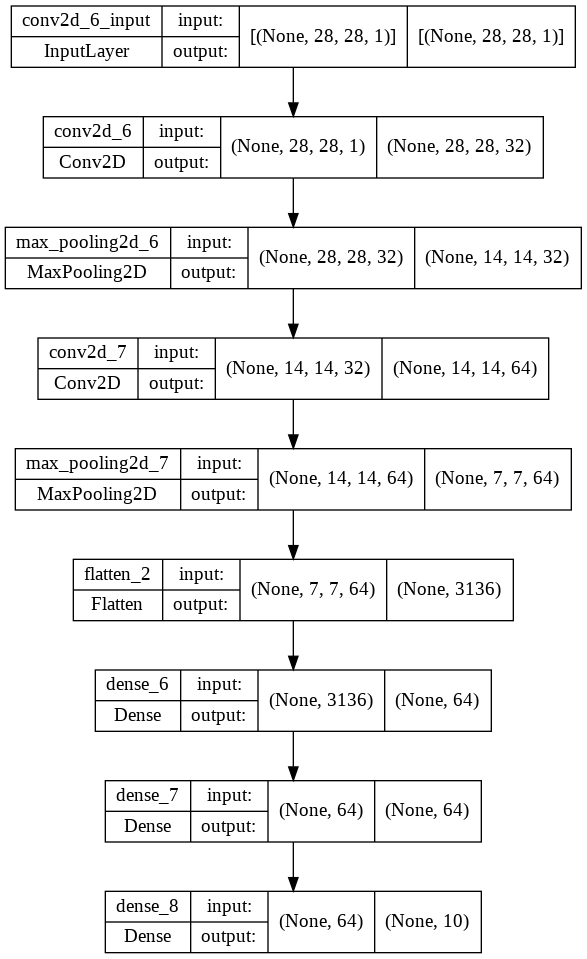

In [14]:
#plot model 
print("↓↓↓ Model_with_shallower_layer ↓↓↓")
plot_model(model_SL, to_file='model.png', show_shapes="True")

↓↓↓ Model_with_deeper_layer ↓↓↓


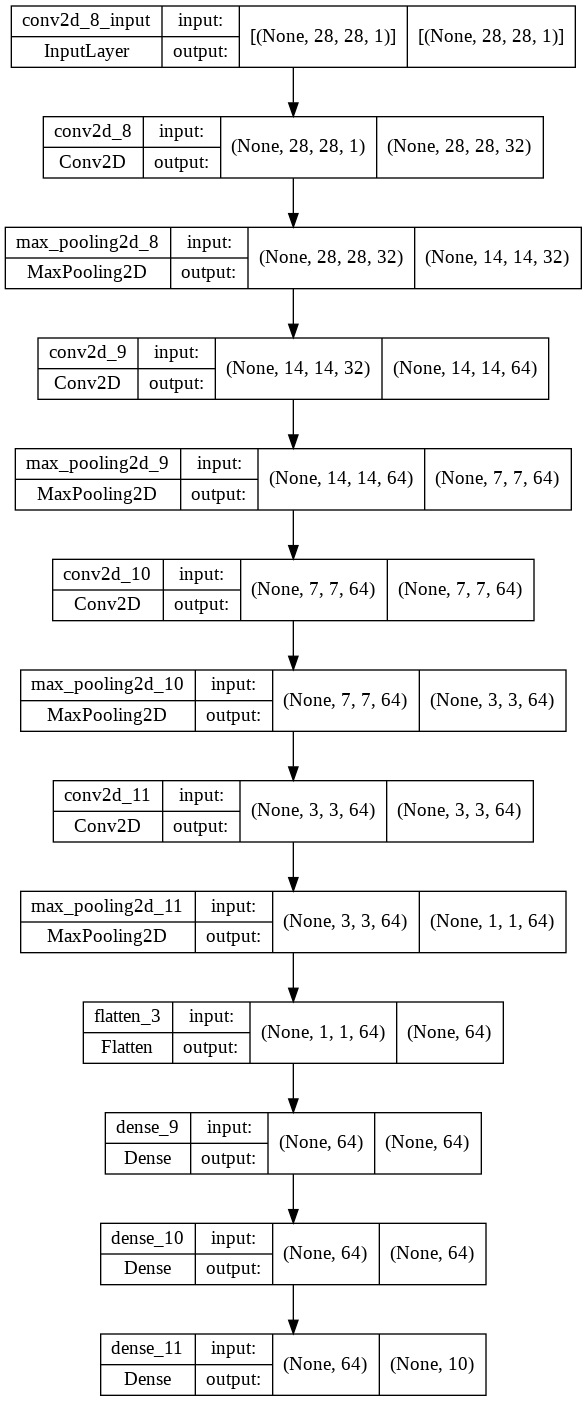

In [15]:
#plot model 
print("↓↓↓ Model_with_deeper_layer ↓↓↓")
plot_model(model_DL, to_file='model.png', show_shapes="True")

In [16]:
#model fit to train model
# Initial_Normal_Model
print("↓↓↓Baseline_Model　↓↓↓")
history = model.fit(train_X, train_y, epochs=10, validation_data=(train_X, train_y), validation_split=num_validation_split)
# Model_with_Batch_Normalization
print("↓↓↓Model_with_Batch_Normalization_layer　↓↓↓")
history_BN = model_BN.fit(train_X, train_y, epochs=10, validation_data=(train_X, train_y), validation_split=num_validation_split)
# Model_with_shallower_layer
print("↓↓↓ Model_with_shallower_layer　↓↓↓")
history_SL = model_SL.fit(train_X, train_y, epochs=10, validation_data=(train_X, train_y), validation_split=num_validation_split)
# Model_with_deeper_lower
print("↓↓↓ Model_with_deeper_layer　↓↓↓")
history_DL = model_DL.fit(train_X, train_y, epochs=10, validation_data=(train_X, train_y), validation_split=num_validation_split)

↓↓↓Baseline_Model　↓↓↓
Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1688/1688 [==============================] - 20s 6ms/step - loss: 0.1686 - accuracy: 0.9462 - val_loss: 0.0641 - val_accuracy: 0.9812
Epoch 2/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0522 - accuracy: 0.9840 - val_loss: 0.0349 - val_accuracy: 0.9905
Epoch 3/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0374 - accuracy: 0.9881 - val_loss: 0.0464 - val_accuracy: 0.9883
Epoch 4/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0293 - accuracy: 0.9906 - val_loss: 0.0304 - val_accuracy: 0.9922
Epoch 5/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0244 - accuracy: 0.9924 - val_loss: 0.0277 - val_accuracy: 0.9910
Epoch 6/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0198 - accuracy: 0.9934 - val_loss: 0.0307 - val_accuracy: 0.9927
Epoch 7/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0166 - accuracy: 0.9941 - val_loss: 0.0252 - val_accuracy: 0.9935
Ep

313/313 [==============================] - 1s 3ms/step - loss: 0.0520 - accuracy: 0.9868
Test set loss of Baseline_Model is  0.05202106758952141
Test set accuracy of Baseline_Model is  0.9868000149726868


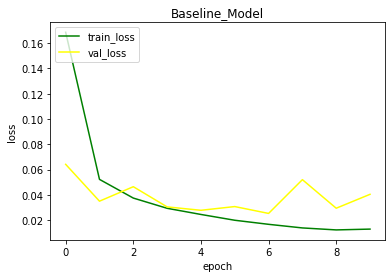

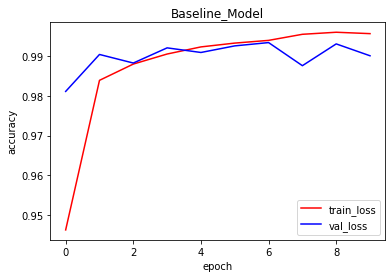

In [17]:
#evaluate the model
# Initial_Normal_Model
#plot and print
test_loss, test_accuracy=model.evaluate(test_X, test_y, verbose=1)
print("Test set loss of Baseline_Model is " ,test_loss)
print("Test set accuracy of Baseline_Model is " ,test_accuracy)
# Initial_Normal_Model
plt.plot(history.history['loss'], color="green")
plt.plot(history.history['val_loss'], color="yellow")
plt.title('Baseline_Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'], loc='upper left')
plt.show()
plt.plot(history.history['accuracy'], color="red")
plt.plot(history.history['val_accuracy'], color="blue")
plt.title('Baseline_Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss',], loc='lower right')
plt.show()

313/313 [==============================] - 1s 3ms/step - loss: 0.0464 - accuracy: 0.9884
Test set loss of Model_with_BN is  0.04637472331523895
Test set accuracy of Model_with_BN is  0.9883999824523926


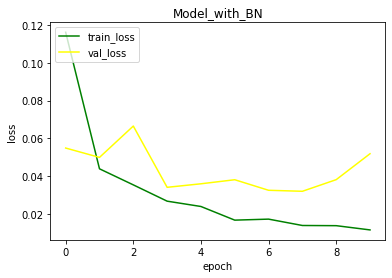

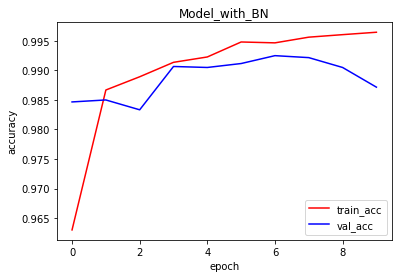

In [18]:
#evaluate the model
# Model_with_Batch_Normalization
#plot and print
test_loss, test_accuracy=model_BN.evaluate(test_X, test_y, verbose=1)
print("Test set loss of Model_with_BN is " ,test_loss)
print("Test set accuracy of Model_with_BN is " ,test_accuracy)
# Model_with_Batch_Normalization
plt.plot(history_BN.history['loss'], color="green")
plt.plot(history_BN.history['val_loss'], color="yellow")
plt.title('Model_with_BN')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'], loc='upper left')
plt.show()
plt.plot(history_BN.history['accuracy'], color="red")
plt.plot(history_BN.history['val_accuracy'], color="blue")
plt.title('Model_with_BN')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(["train_acc", "val_acc"], loc='lower right')
plt.show()

313/313 [==============================] - 1s 3ms/step - loss: 0.0582 - accuracy: 0.9857
Test set loss of Model_with_shallower_layer is  0.05822271853685379
Test set accuracy of Model_with_shallower_layer is  0.9857000112533569


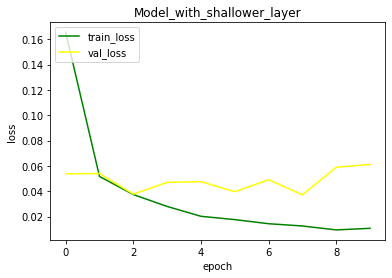

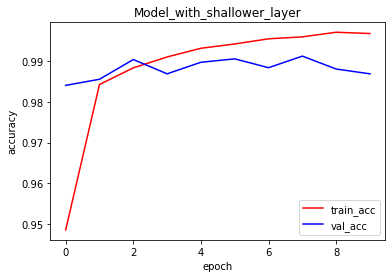

In [19]:
#evaluate the model
# Model_with_shallower_layer
#plot and print
test_loss, test_accuracy=model_SL.evaluate(test_X, test_y, verbose=1)
print("Test set loss of Model_with_shallower_layer is " ,test_loss)
print("Test set accuracy of Model_with_shallower_layer is " ,test_accuracy)
# Model_with_shallower_layer
plt.plot(history_SL.history['loss'], color="green")
plt.plot(history_SL.history['val_loss'], color="yellow")
plt.title('Model_with_shallower_layer')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'], loc='upper left')
plt.show()
plt.plot(history_SL.history['accuracy'], color="red")
plt.plot(history_SL.history['val_accuracy'], color="blue")
plt.title('Model_with_shallower_layer')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(["train_acc", "val_acc"], loc='lower right')
plt.show()

313/313 [==============================] - 1s 3ms/step - loss: 0.0384 - accuracy: 0.9896
Test set loss Model_with_deeper_layer is  0.038419902324676514
Test set accuracy Model_with_deeper_layer is  0.9896000027656555


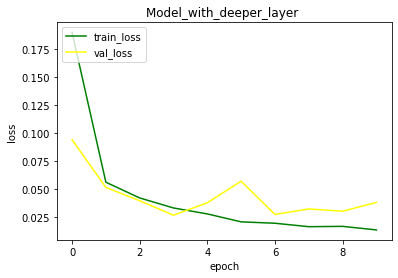

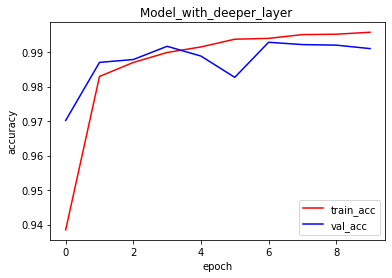

In [20]:
#evaluate the model
# Model_with_deeper_layer
#plot and print
test_loss, test_accuracy=model_DL.evaluate(test_X, test_y, verbose=1)
print("Test set loss Model_with_deeper_layer is " ,test_loss)
print("Test set accuracy Model_with_deeper_layer is " ,test_accuracy)
# Model_with_deeper_layer
plt.plot(history_DL.history['loss'], color="green")
plt.plot(history_DL.history['val_loss'], color="yellow")
plt.title('Model_with_deeper_layer ')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'], loc='upper left')
plt.show()
plt.plot(history_DL.history['accuracy'], color="red")
plt.plot(history_DL.history['val_accuracy'], color="blue")
plt.title('Model_with_deeper_layer ')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(["train_acc", "val_acc"], loc='lower right')
plt.show()

# Plot certain image from dataset and successively predict

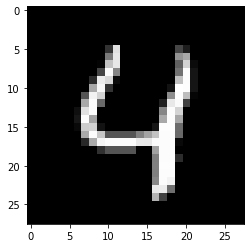

In [21]:
#predict certian image from test dataset
#show image
image1 = test_X[4]
plt.imshow(np.squeeze(image1), cmap='gray')
plt.show()

In [22]:
#predict result
image1 = image1.reshape(-1,28,28,1)
p = model.predict([image1])
print('predicted: {}'.format(np.argmax(p)))

predicted: 4
